# Case Study 3 : Analyzing data from MovieLens

**Due Date: Due Date: November 2, by 5:59pm**


## The MovieLens data sets


http://grouplens.org/datasets/movielens/



In [28]:
from IPython.lib.display import YouTubeVideo

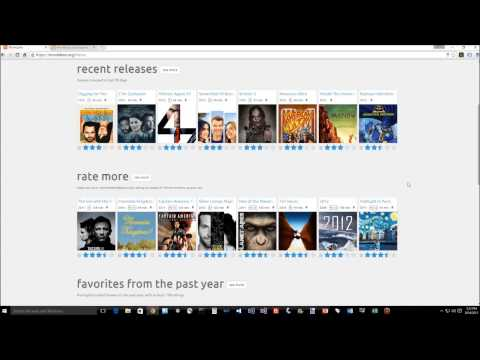

In [29]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** 

Please EDIT this cell and add the names of all the team members in your team:

    1. Nitya Phani Santosh Oruganty
    
    2. Sreeram Marimuthu
    
    3. Chithramvel Sanarpalayam Selvamuthukumar
 
 Group Name : The Boys [Group 5]

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how they rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!




# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [1]:
import pandas as pd

#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------


In [7]:
import pandas as pd
import numpy as np

# Load movies.dat
movies_df = pd.read_csv('movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'],engine='python', encoding='ISO-8859-1')

# Load ratings.dat
ratings_df = pd.read_csv('ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python',encoding='ISO-8859-1')

# Load users.dat
users_df = pd.read_csv('users.dat', sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zip'], engine='python',encoding='ISO-8859-1')


# Merge the DataFrames
merged_df = pd.merge(ratings_df, movies_df, on='movie_id')
final_df = pd.merge(merged_df, users_df, on='user_id')

# Store the merged DataFrame into an HDF5 file without specifying columns
final_df.to_hdf('MovieLensData.h5', key='data', mode='w', format='table')

# Verify the columns after loading from HDF5
h5_df = pd.read_hdf('MovieLensData.h5', key='data')
print(h5_df.columns)



Index(['user_id', 'movie_id', 'rating', 'timestamp', 'title', 'genres',
       'gender', 'age', 'occupation', 'zip'],
      dtype='object')


In [8]:
mldf=pd.read_hdf("MovieLensData.h5")
mldf.head()
#Each line of this file represents one rating of one movie by one user -- timestamp_x
#Each line of this file represents one tag applied to one movie by one user -- timestamp_y

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [9]:
# Group by movie and calculate the average rating for each movie
average_ratings = mldf.groupby('movie_id')['rating'].mean()

# Filter movies with an average rating greater than 4.5
highly_rated_movies = average_ratings[average_ratings > 4.5]

# Count the number of highly rated movies
num_highly_rated_movies = len(highly_rated_movies)

print(f"Number of movies with an average rating over 4.5: {num_highly_rated_movies}")


Number of movies with an average rating over 4.5: 21


In [10]:
# Group by movie and user gender and calculate the average rating for each movie within each gender group
average_ratings = mldf.groupby(['movie_id', 'gender'])['rating'].mean().unstack()

# Filter movies with an average rating greater than 4.5 for each gender
highly_rated_movies_men = average_ratings['M'][average_ratings['M'] > 4.5]
highly_rated_movies_women = average_ratings['F'][average_ratings['F'] > 4.5]

# Count the number of highly rated movies for men and women
num_highly_rated_movies_men = len(highly_rated_movies_men)
num_highly_rated_movies_women = len(highly_rated_movies_women)

print(f"Number of highly rated movies among men: {num_highly_rated_movies_men}")
print(f"Number of highly rated movies among women: {num_highly_rated_movies_women}")


Number of highly rated movies among men: 23
Number of highly rated movies among women: 51


In [11]:
# Calculate the median rating for each movie
median_ratings = mldf.groupby('movie_id')['rating'].median()

# Filter for men over the age of 30
men_over_30 = mldf[(mldf['gender'] == 'M') & (mldf['age'] > 30)]

# Filter for women over the age of 30
women_over_30 = mldf[(mldf['gender'] == 'F') & (mldf['age'] > 30)]

# Calculate the number of movies with a median rating over 4.5 for each group
movies_M = median_ratings[men_over_30['movie_id']].gt(4.5).sum()
movies_W = median_ratings[women_over_30['movie_id']].gt(4.5).sum()

print(f"Number of movies with a median rating over 4.5 among men over 30: {movies_M}")
print(f"Number of movies with a median rating over 4.5 among women over 30: {movies_W}")


Number of movies with a median rating over 4.5 among men over 30: 19428
Number of movies with a median rating over 4.5 among women over 30: 6994


The definition of "popular" in the context of movies can vary, but a reasonable and widely accepted way to measure the popularity of a movie is by considering the number of user ratings it has received. A movie with a significant number of ratings is generally more likely to be well-known and watched by a larger audience. Therefore, we can define "popular" as the movies with the most user ratings.

In this code, we first count the number of ratings for each movie. Then, we sort the movies in descending order based on the number of ratings and select the top ten. We also merge this information with movie titles for readability.

This approach defines "popular" movies as those that have received the most user ratings, indicating a higher level of exposure and viewer engagement. It's a reasonable choice because it reflects how well-known and widely watched a movie is within the user community, which is a key aspect of a movie's popularity.

In [12]:
# Calculate the number of ratings for each movie
movie_ratings_count = mldf['movie_id'].value_counts()

# Sort movies by the number of ratings in descending order
popular_movies = movie_ratings_count.sort_values(ascending=False)

# Get the top ten most popular movies
top_10_popular_movies = popular_movies.head(10)

# Merge with movie titles for readability
top_10_popular_movies = top_10_popular_movies.reset_index()
top_10_popular_movies.columns = ['movie_id', 'number_of_ratings']
top_10_popular_movies = pd.merge(top_10_popular_movies, mldf[['movie_id', 'title']], on='movie_id').drop_duplicates()

print("The ten most popular movies based on the number of ratings:")
print(top_10_popular_movies[['title', 'number_of_ratings']])


The ten most popular movies based on the number of ratings:
                                                   title  number_of_ratings
0                                 American Beauty (1999)               3428
3428           Star Wars: Episode IV - A New Hope (1977)               2991
6419   Star Wars: Episode V - The Empire Strikes Back...               2990
9409   Star Wars: Episode VI - Return of the Jedi (1983)               2883
12292                               Jurassic Park (1993)               2672
14964                         Saving Private Ryan (1998)               2653
17617                  Terminator 2: Judgment Day (1991)               2649
20266                                 Matrix, The (1999)               2590
22856                          Back to the Future (1985)               2583
25439                   Silence of the Lambs, The (1991)               2578


Conjectures about how easy various groups are to please based on movie ratings, we can analyze the data and look for trends. Here are a few conjectures and ways to support or disprove them with data:

**Conjecture 1:** Users with the occupation "writer" give lower ratings on average.
We can calculate the average rating for users with the occupation "writer" and compare it with other occupations to test this conjecture.


In [12]:
occupation_ratings = mldf.groupby('occupation')['rating'].mean()
print(occupation_ratings)

# From this result we can say that writers(20) do not give lower ratings on average
# whereas unemployed(19) people give lower ratings

occupation
0     3.537544
1     3.576642
2     3.573081
3     3.656516
4     3.536793
5     3.537529
6     3.661578
7     3.599772
8     3.466741
9     3.656589
10    3.532675
11    3.617371
12    3.654001
13    3.781736
14    3.618481
15    3.689774
16    3.596575
17    3.613574
18    3.530117
19    3.414050
20    3.497392
Name: rating, dtype: float64


**Conjecture 2**: Men are more generous with high ratings (4 or 5) than women.

Calculate the proportion of ratings 4 or 5 given by men and women, and compare these proportions.

In [31]:
gender_ratings = mldf.groupby('gender')['rating'].value_counts(normalize=True).unstack()[[4, 5]]
print(gender_ratings)

#The Result below shows that women are more generous with high ratings( 4 or 5 ) than women.

rating         4         5
gender                    
F       0.353161  0.237567
M       0.347504  0.222567


**Conjecture 3**: Movies in the "Action" genre tend to receive higher average ratings than movies in the "Romance" genre.

Calculate the average rating for movies in the "Action" genre and compare it to the average rating for movies in the "Romance" genre.


In [15]:
action_avg_rating = mldf[mldf['genres'].str.contains('Action')]['rating'].mean()
print("Average Action Movie Rating :",action_avg_rating)
romance_avg_rating = mldf[mldf['genres'].str.contains('Romance')]['rating'].mean()
print("Average Romance Movie Rating :",romance_avg_rating)
avg_movie_rating = mldf.groupby('genres')['rating'].mean()
print(avg_movie_rating)


Average Action Movie Rating : 3.4911849357368414
Average Romance Movie Rating : 3.607464598740535
genres
Action                                           3.354886
Action|Adventure                                 3.676814
Action|Adventure|Animation                       4.147826
Action|Adventure|Animation|Children's|Fantasy    2.703704
Action|Adventure|Animation|Horror|Sci-Fi         3.546926
                                                   ...   
Sci-Fi|Thriller|War                              3.439286
Sci-Fi|War                                       4.449890
Thriller                                         3.555879
War                                              3.889001
Western                                          3.853226
Name: rating, Length: 301, dtype: float64


**Conjecture 4**: Users have a preference for specific movie genres, and their ratings may vary depending on the genre.**
We can conjecture that users are more likely to give higher ratings to movies in certain genres that align with their preferences.

To support or disprove this conjecture, we can:

1. Calculate the average rating for each genre.
2. Identify which genres have the highest average ratings.
3. Print out the top genres and their corresponding average ratings.

This code calculates the average rating for each genre and identifies the genres with the highest average ratings. It provides insights into whether specific genres are preferred by users, supporting or disproving the conjecture.

In [16]:
# Calculate the average rating for each genre
genre_ratings = mldf.groupby('genres')['rating'].mean().reset_index()

# Identify the top genres with the highest average ratings
top_genres = genre_ratings.nlargest(5, 'rating')

print("Conjecture 4: Users have a preference for specific movie genres and their ratings may vary depending on the genre.")
print("Top Genres with Highest Average Ratings:")
for index, row in top_genres.iterrows():
    print(f"Genre: {row['genres']}, Average Rating: {row['rating']:.2f}")


Conjecture 4: Users have a preference for specific movie genres and their ratings may vary depending on the genre.
Top Genres with Highest Average Ratings:
Genre: Animation|Comedy|Thriller, Average Rating: 4.47
Genre: Sci-Fi|War, Average Rating: 4.45
Genre: Animation, Average Rating: 4.39
Genre: Film-Noir|Mystery, Average Rating: 4.37
Genre: Adventure|War, Average Rating: 4.35


**Conjecture 5: The choice of movie genres and the average rating given by users may vary based on their age group.**

We can conjecture that users of different age groups may have varying preferences for movie genres and that their average ratings for those genres may reflect these differences. To support or disprove this conjecture, we can:

1. Calculate the average rating for each combination of age group and genre.
2. Identify which age group and genre combinations have the highest average ratings.
3. Print out the top combinations and their corresponding average ratings.

This code calculates the average rating for each combination of age group and genre and identifies the combinations with the highest average ratings. It helps explore whether different age groups have preferences for specific genres and whether these preferences are reflected in their average ratings.


In [17]:
# Define age group bins (e.g., 0-9, 10-19, 20-29, etc.)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['0-10', '10-20', '20-20', '30-40', '40-50', '50-60', '60-70', '70+']
mldf['age_group'] = pd.cut(mldf['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the average rating for each combination of age group and genre
age_genre_ratings = mldf.groupby(['age_group', 'genres'])['rating'].mean().reset_index()

# Identify the top combinations with the highest average ratings
top_combinations = age_genre_ratings.nlargest(5, 'rating')

print("Conjecture 5: The choice of movie genres and the average rating given by users may vary based on their age group.")
print("Top Age-Genre Combinations with Highest Average Ratings:")
for index, row in top_combinations.iterrows():
    print(f"Age Group: {row['age_group']}, Genre: {row['genres']}, Average Rating: {row['rating']:.2f}")


Conjecture 5: The choice of movie genres and the average rating given by users may vary based on their age group.
Top Age-Genre Combinations with Highest Average Ratings:
Age Group: 0-10, Genre: Film-Noir|Romance|Thriller, Average Rating: 4.67
Age Group: 0-10, Genre: Action|Adventure|Animation, Average Rating: 4.64
Age Group: 0-10, Genre: Crime|Film-Noir|Mystery, Average Rating: 4.62
Age Group: 50-60, Genre: Drama|Romance|Sci-Fi, Average Rating: 4.57
Age Group: 10-20, Genre: Animation|Comedy|Thriller, Average Rating: 4.56


# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [4]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

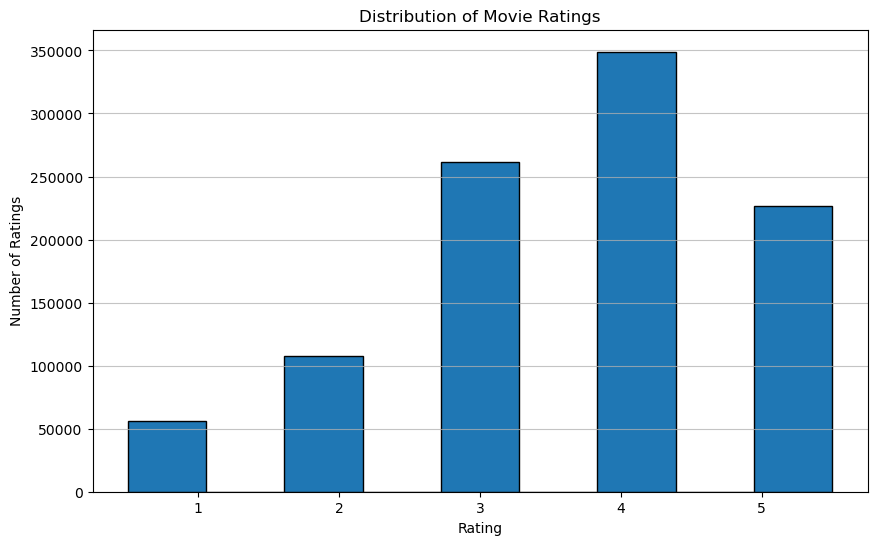

In [18]:
import matplotlib.pyplot as plt

# Create a histogram of movie ratings
plt.figure(figsize=(10, 6))
plt.hist(mldf['rating'], bins=9, range=(0.5, 5.5), edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(range(1, 6))
plt.grid(axis='y', alpha=0.75)

plt.show()


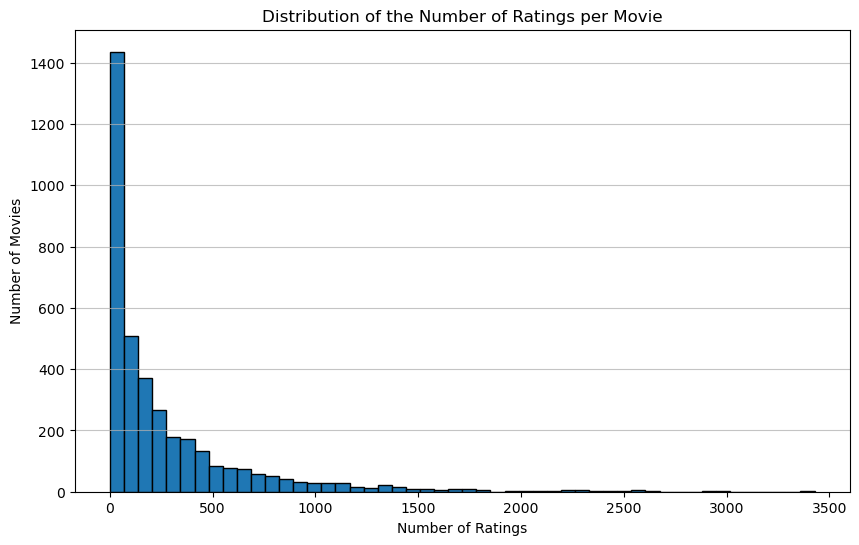

In [19]:
# Group the data by movie ID and count the number of ratings for each movie
movie_ratings_count = mldf['movie_id'].value_counts().reset_index()
movie_ratings_count.columns = ['movie_id', 'num_ratings']

# Create a histogram of the number of ratings per movie
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings_count['num_ratings'], bins=50, edgecolor='black')
plt.title('Distribution of the Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.75)

plt.show()


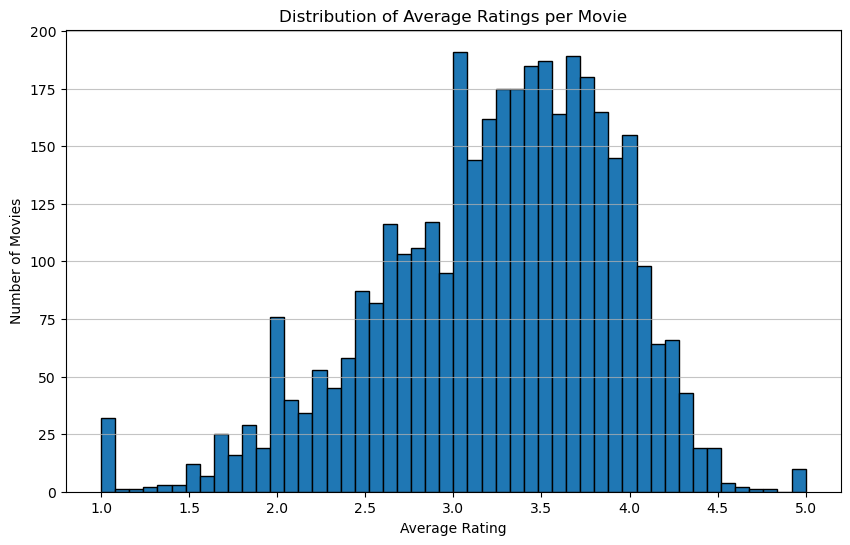

In [20]:
# Calculate the average rating for each movie
average_ratings = mldf.groupby('movie_id')['rating'].mean()

# Create a histogram of the average ratings
plt.figure(figsize=(10, 6))
plt.hist(average_ratings, bins=50, edgecolor='black')
plt.title('Distribution of Average Ratings per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.75)

plt.show()


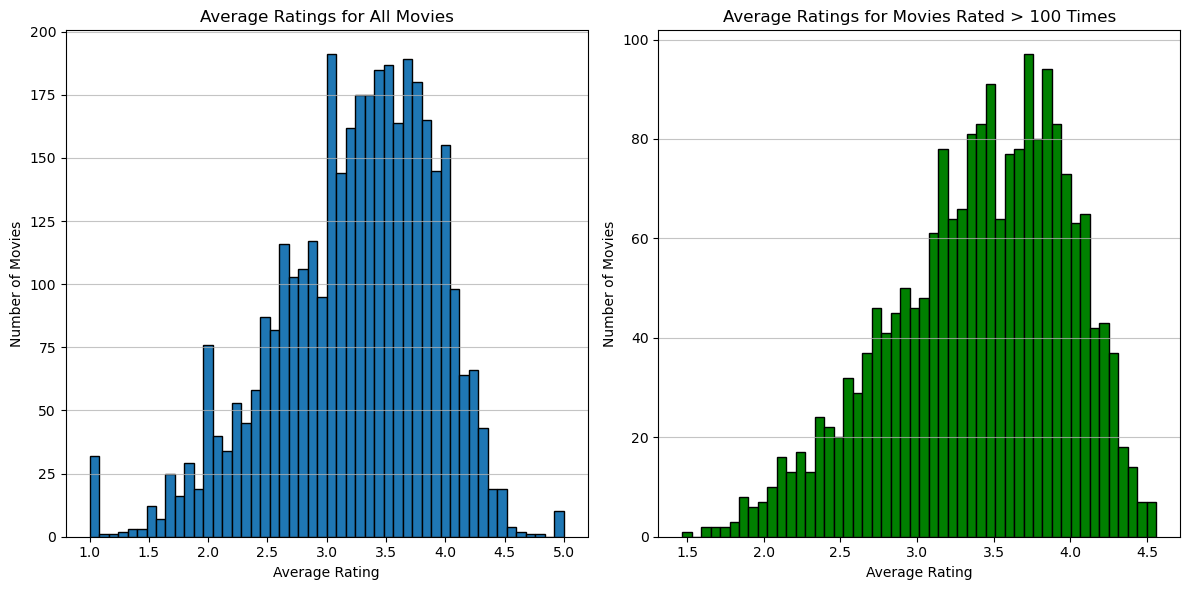

In [21]:
# Calculate the average rating for each movie
average_ratings = mldf.groupby('movie_id')['rating'].mean()

# Count the number of ratings for each movie
movie_ratings_count = mldf['movie_id'].value_counts()

# Filter movies that are rated more than 100 times
popular_movies = movie_ratings_count[movie_ratings_count > 100]
average_ratings_popular = average_ratings[popular_movies.index]

# Create histograms for all movies and popular movies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(average_ratings, bins=50, edgecolor='black')
plt.title('Average Ratings for All Movies')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 2, 2)
plt.hist(average_ratings_popular, bins=50, edgecolor='black', color='green')
plt.title('Average Ratings for Movies Rated > 100 Times')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()

plt.show()


To plot a histogram of the average rating for movies that are rated more than 100 times and compare it with a histogram of the average rating for all movies, you can follow these steps:

In the code above, we first calculate the average ratings for all movies and count the number of ratings for each movie. Then, we filter out movies that are rated more than 100 times and calculate the average ratings for these popular movies. We create two histograms: one for all movies and one for popular movies, and we visualize the distribution of average ratings.

Observations:
1. **Tails of the Histogram**: When comparing the two histograms, you might observe that the tail of the histogram for all movies (on the left) extends farther towards higher and lower ratings compared to the histogram for popular movies (on the right). This indicates that movies with very few ratings (both very low and very high) are included in the histogram for all movies, which can result in a broader distribution.

2. **Trustworthiness of Highly Rated Movies**: Generally, movies with a high average rating and a significant number of ratings (more than 100 times) are likely to be more trustworthy indicators of movie quality. This is because a larger number of ratings provides a more robust and representative measure of a movie's quality. Movies with fewer than 100 ratings may have highly variable average ratings due to the small sample size, making them less reliable indicators of quality.

In summary, when assessing the quality of highly rated movies, it is more reliable to consider movies that have been rated more than 100 times, as they are likely to be more representative of the general audience's opinion.

**Conjecture 1:** Movie ratings correlate with the release year of the film.
We can conjecture that older movies might receive higher or lower ratings compared to more recent releases.

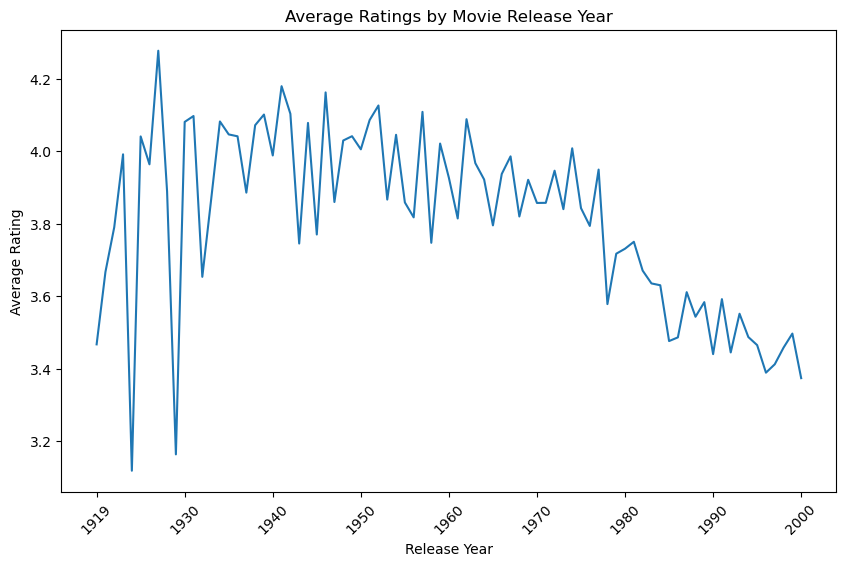

In [22]:
# Extract the release year from the movie title
mldf['release_year'] = mldf['title'].str.extract(r'\((\d{4})\)')

# Calculate the average rating for each release year
release_year_ratings = mldf.groupby('release_year')['rating'].mean()

# Plot the average ratings by release year
plt.figure(figsize=(10, 6))
release_year_ratings.plot()
plt.title('Average Ratings by Movie Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


**Conjecture 2**: Are certain genres of movies more likely to get higher ratings? 

In [25]:
# Group the dataset by genre and calculate the average rating for each genre.
genre_ratings = mldf.groupby('genres')['rating'].mean()

# Sort the genres by average rating in descending order to identify the highest-rated genres.
genre_ratings = genre_ratings.sort_values(ascending=False)
print("Average ratings for each genre:")
print(genre_ratings)


Average ratings for each genre:
genres
Animation|Comedy|Thriller              4.473837
Sci-Fi|War                             4.449890
Animation                              4.394336
Film-Noir|Mystery                      4.367424
Adventure|War                          4.346107
                                         ...   
Action|Adventure|Children's|Fantasy    2.090909
Comedy|Film-Noir|Thriller              2.000000
Action|Adventure|Children's|Sci-Fi     1.874286
Action|Children's                      1.742373
Action|Adventure|Children's            1.318182
Name: rating, Length: 301, dtype: float64


**Conjecture 3**: Are movies that are of more than one particular genre likely to have more ratings than movies with only one genre?

In [27]:
# Create a new column 'num_genres' to count the number of genres for each movie.
mldf['num_genres'] = mldf['genres'].str.split('|').apply(len)

# Calculate the average number of ratings for movies with one genre and movies with more than one genre.
avg_ratings_by_num_genres = mldf.groupby('num_genres')['rating'].mean()
print("Average ratings by the number of genres:")
print(avg_ratings_by_num_genres)


Average ratings by the number of genres:
num_genres
1    3.579876
2    3.585568
3    3.572580
4    3.569970
5    3.723008
6    3.380952
Name: rating, dtype: float64


**Conjecture 4**: Young adults in their 20s and 30s are more likely to give extreme ratings (1 or 5) because they are more passionate about movies and tend to have stronger opinions.

Calculating the proportion of ratings 1 and 5 for different age groups, and compare the results. If the proportion of 1 or 5 ratings is higher for the 20s and 30s age group, it would support the conjecture.


In [33]:
age_groups = mldf.groupby('age')
proportion_extreme_ratings = age_groups['rating'].value_counts(normalize=True).unstack()[[1, 5]]
print("proportion_extreme_ratings: ",proportion_extreme_ratings)

proportion_extreme_ratings:  rating         1         5
age                       
1       0.082246  0.249972
18      0.071174  0.220981
25      0.060416  0.216733
35      0.045562  0.224670
45      0.040761  0.228881
50      0.040668  0.256587
56      0.039995  0.277669


**Conjecture 5**: Children (ages 1-10) are more likely to rate a movie 5 because they might be less critical and more inclined to enjoy movies.

Calculating the proportion of ratings 5 for the age group 1-10 and compare it with other age groups. If the proportion of 5 ratings is significantly higher for this age group, it would support the conjecture.

In [35]:
age_groups = mldf.groupby('age')
proportion_rating_5 = age_groups['rating'].value_counts(normalize=True).unstack()[5]
print("proportion_rating_5: ",proportion_rating_5)

proportion_rating_5:  age
1     0.249972
18    0.220981
25    0.216733
35    0.224670
45    0.228881
50    0.256587
56    0.277669
Name: 5, dtype: float64


**Conjecture 6**: Middle-aged individuals (40s and 50s) are more critical and less likely to give extreme ratings.

Calculating the proportion of ratings 1 and 5 for the 40s and 50s age group and compare it with other age groups. If the proportion of 1 or 5 ratings is lower for this age group, it would support the conjecture.

In [36]:
age_groups = mldf.groupby('age')
proportion_extreme_ratings = age_groups['rating'].value_counts(normalize=True).unstack()[[1, 5]]
print("proportion_extreme_ratings: ",proportion_extreme_ratings)

proportion_extreme_ratings:  rating         1         5
age                       
1       0.082246  0.249972
18      0.071174  0.220981
25      0.060416  0.216733
35      0.045562  0.224670
45      0.040761  0.228881
50      0.040668  0.256587
56      0.039995  0.277669


**Conjecture 7**: Gender has an impact on extreme ratings, with men more likely to give extreme ratings than women.

Calculating the proportion of ratings 1 and 5 for men and women, and compare the results. If the proportion of 1 or 5 ratings is higher for one gender, it would support the conjecture.

In [37]:
gender_groups = mldf.groupby('gender')
proportion_extreme_ratings = gender_groups['rating'].value_counts(normalize=True).unstack()[[1, 5]]
print("proportion_extreme_ratings: ",proportion_extreme_ratings)


proportion_extreme_ratings:  rating         1         5
gender                    
F       0.054159  0.237567
M       0.056817  0.222567


*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [5]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

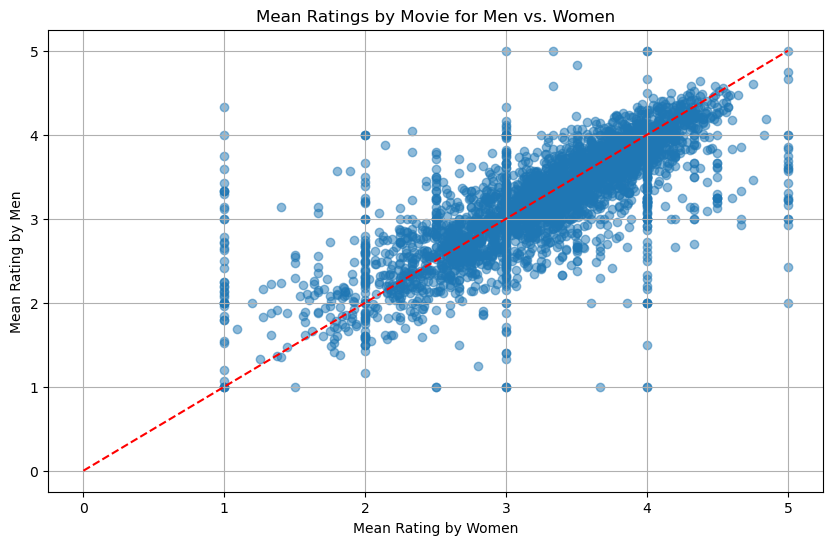

General Corr.: 0.7631898908583271


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by movie and gender, and calculate the mean rating
mean_ratings = mldf.groupby(['movie_id', 'gender'])['rating'].mean().unstack()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_ratings['F'], mean_ratings['M'], alpha=0.5)
plt.title('Mean Ratings by Movie for Men vs. Women')
plt.xlabel('Mean Rating by Women')
plt.ylabel('Mean Rating by Men')
plt.grid(True)

# Add a diagonal line for reference
plt.plot([0, 5], [0, 5], color='red', linestyle='--')

# Show the plot
plt.show()

print("General Corr.:", mean_ratings['M'].corr(mean_ratings['F']))

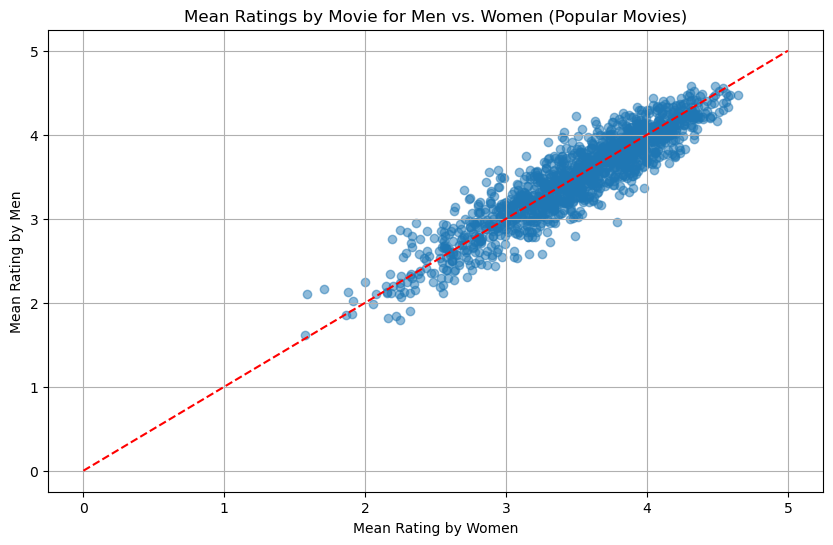

Corr. for Popular Movies:  0.9189627226871068


In [42]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the total ratings for each movie
total_ratings = mldf['movie_id'].value_counts()

# Filter movies with 200 or more total ratings
popular_movies = total_ratings[total_ratings >= 200].index

# Filter the DataFrame to include only popular movies
mldf_filtered = mldf[mldf['movie_id'].isin(popular_movies)]

# Group the filtered data by movie and gender and calculate the mean rating
mean_ratings = mldf_filtered.groupby(['movie_id', 'gender'])['rating'].mean().unstack()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_ratings['F'], mean_ratings['M'], alpha=0.5)
plt.title('Mean Ratings by Movie for Men vs. Women (Popular Movies)')
plt.xlabel('Mean Rating by Women')
plt.ylabel('Mean Rating by Men')
plt.grid(True)

# Add a diagonal line for reference
plt.plot([0, 5], [0, 5], color='red', linestyle='--')

# Show the plot
plt.show()

print("Corr. for Popular Movies: ", mean_ratings['M'].corr(mean_ratings['F']))

In [43]:
import pandas as pd


# Group the data by movie and calculate the mean rating for each gender
mean_ratings = mldf.groupby(['movie_id', 'gender'])['rating'].mean().unstack()

# Calculate the correlation coefficient
correlation_coefficient = mean_ratings['M'].corr(mean_ratings['F'])

# Print the correlation coefficient
print(f"Correlation Coefficient between Men and Women Ratings: {correlation_coefficient:.2f}")

# Make observations
if correlation_coefficient > 0:
    print("There is a positive correlation between ratings given by men and women.")
    print("This suggests that, on average, when men rate a movie higher, women tend to rate it higher as well, and vice versa.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between ratings given by men and women.")
    print("This suggests that, on average, when men rate a movie higher, women tend to rate it lower, and vice versa.")
else:
    print("There is no strong linear relationship between ratings given by men and women.")


Correlation Coefficient between Men and Women Ratings: 0.76
There is a positive correlation between ratings given by men and women.
This suggests that, on average, when men rate a movie higher, women tend to rate it higher as well, and vice versa.


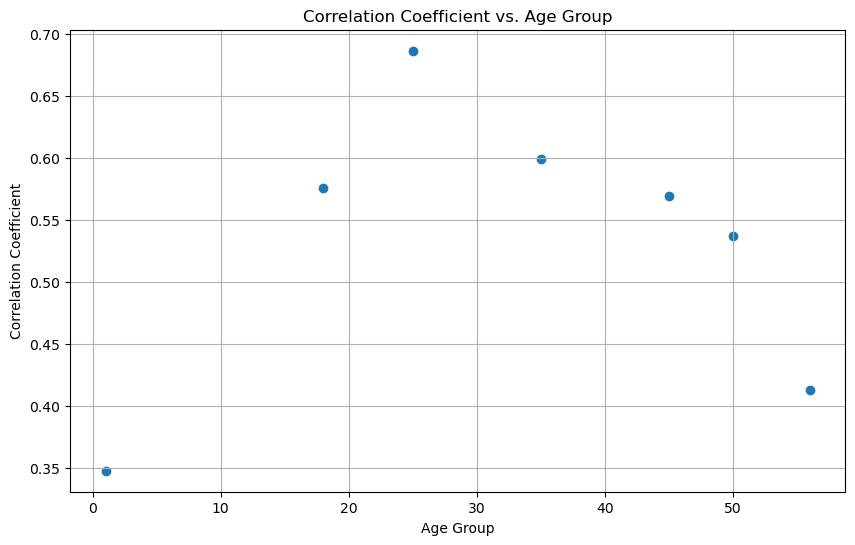

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the correlation coefficient for different age groups
age_groups = mldf['age'].unique()
correlation_coefficients = []

for age_group in age_groups:
    # Filter the data for the current age group
    subset = mldf[mldf['age'] == age_group]
    
    # Group the data by movie and calculate mean ratings for men and women
    mean_ratings = subset.groupby(['movie_id', 'gender'])['rating'].mean().unstack()
    
    # Calculate the correlation coefficient
    correlation_coefficient = mean_ratings['M'].corr(mean_ratings['F'])
    correlation_coefficients.append(correlation_coefficient)

# Create a scatter plot to visualize the relationship between age and correlation coefficient
plt.figure(figsize=(10, 6))
plt.scatter(age_groups, correlation_coefficients)
plt.title('Correlation Coefficient vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Correlation Coefficient')
plt.grid(True)

# Show the plot
plt.show()


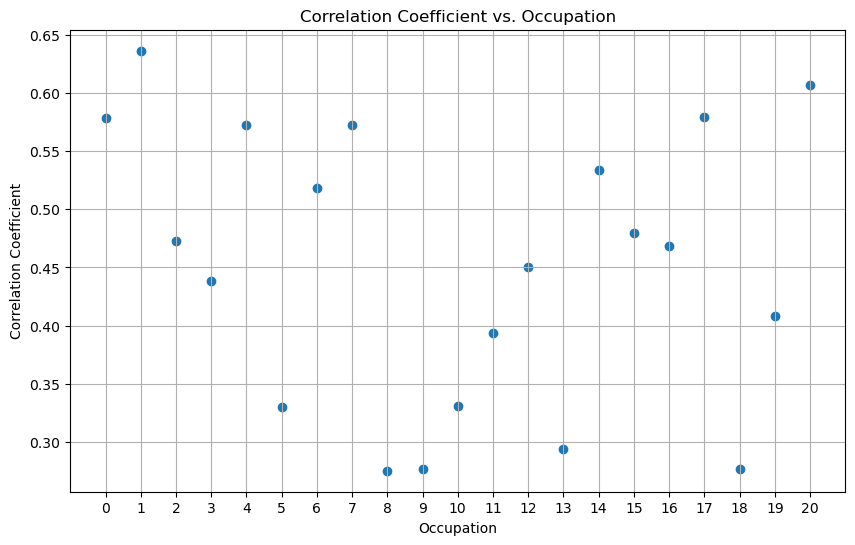

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation coefficient for different occupations
occupations = mldf['occupation'].unique()
correlation_coefficients = []

for occupation in occupations:
    # Filter the data for the current occupation
    subset = mldf[mldf['occupation'] == occupation]
    
    # Group the data by movie and calculate mean ratings for men and women
    mean_ratings = subset.groupby(['movie_id', 'gender'])['rating'].mean().unstack()
    
    # Calculate the correlation coefficient
    correlation_coefficient = mean_ratings['M'].corr(mean_ratings['F'])
    correlation_coefficients.append(correlation_coefficient)

# Create a scatter plot to visualize the relationship between occupation and correlation coefficient
plt.figure(figsize=(10, 6))
plt.scatter(occupations, correlation_coefficients)
plt.xticks(range(len(occupations)), range(21))
plt.title('Correlation Coefficient vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Correlation Coefficient')
plt.grid(True)

# Show the plot
plt.show()


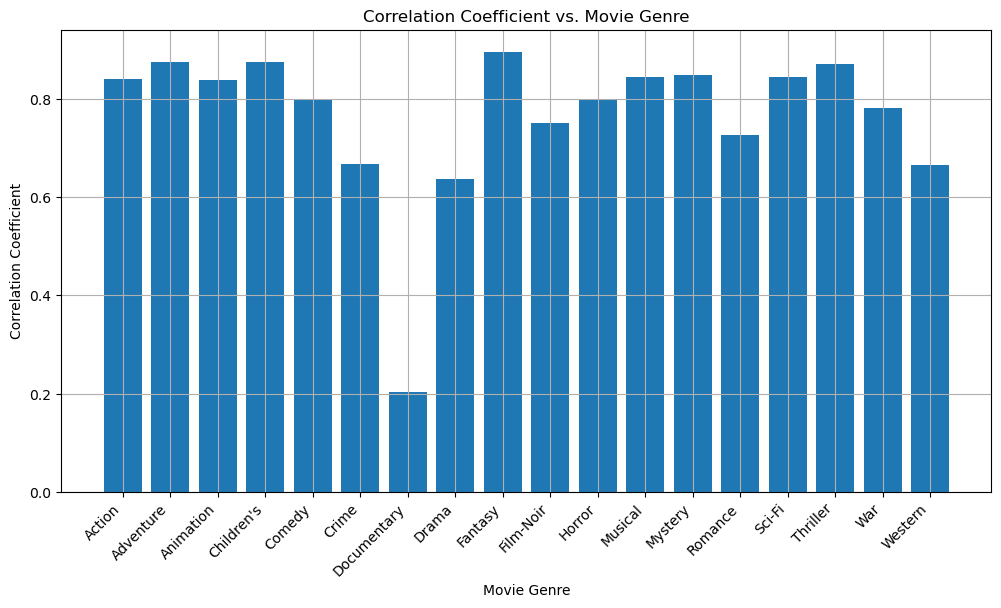

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation coefficient for different movie genres
movie_genres = [
    'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
    'Thriller', 'War', 'Western'
]

correlation_coefficients = []

for genre in movie_genres:
    # Filter the data for the current movie genre
    subset = mldf[mldf['genres'].str.contains(genre)]
    
    # Group the data by movie and calculate mean ratings for men and women
    mean_ratings = subset.groupby(['movie_id', 'gender'])['rating'].mean().unstack()
    
    # Calculate the correlation coefficient
    correlation_coefficient = mean_ratings['M'].corr(mean_ratings['F'])
    correlation_coefficients.append(correlation_coefficient)

# Create a bar chart to visualize the relationship between genre and correlation coefficient
plt.figure(figsize=(12, 6))
plt.bar(movie_genres, correlation_coefficients)
plt.title('Correlation Coefficient vs. Movie Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Show the plot
plt.show()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the conditions
movie_genre_condition = ~mldf['genres'].str.contains('Documentary')
age_condition = (mldf['age'] >= 20) & (mldf['age'] <= 30)
occupation_condition = mldf['occupation'].isin([1,20])

# Apply the conditions to filter the data
filtered_data = mldf[movie_genre_condition & age_condition & occupation_condition]

# Group the filtered data by movie and calculate mean ratings for men and women
mean_ratings = filtered_data.groupby(['movie_id', 'gender'])['rating'].mean().unstack()

# Calculate the correlation coefficient
correlation_coefficient = mean_ratings['M'].corr(mean_ratings['F'])

# Print the correlation coefficient
print(f"Correlation Coefficient for Specified Conditions: {correlation_coefficient:.2f}")


Correlation Coefficient for Specified Conditions: 0.60


# Problem 4: (10 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer. 
* Suppose you are a Data Scientist at a movie company.  **Convince your boss that your conjecture is correct!**

####  \~\~ write here \~\~





2.
b) The definition of "popular" in the context of movies can vary, but for the purposes of this study it is defined as the likelihood that a random person chosen in the public has watched a particular movie. A reasonable way to measure this for a given movie is to simply consider the number of user ratings it has received. A movie that is generally more likely to be well-known and watched by a larger audience will have a higher number of ratings.

This definition is chosen as making it any more specific with the available data will impose certain assumptions that will not give a true indication. Eg. A movie might have a low rating but was more popular because it was marketed better or it had popular actors.

In this code, we first count the number of ratings for each movie and then sort the movies in descending order based on the number of ratings. The top ten movies are selected and we also merge this information with movie titles for readability.

3.
c) It can be seen from the two plots that in general, men and women do have a significant chance to rate movies high when the other has rated it low and vice-versa. However, for the more popular movies this is no longer the case as they are consistent in their ratings for a given movies. This is further proven by the respective correlation values (0.76 and 0.91) that popular movies are almost certain to be rated equally low or high by both men and women.

d) Conjecture 1: Men and women may be more similar in their movie ratings when they are older. 
If the scatter plot shows a trend where the correlation coefficient increases as people get older, it would support the conjecture that men and women are more similar in their movie ratings when they are older. 

Conjecture 2: Men and women may be more similar in their movie ratings when they are in the same occupation. 

Conjecture 3: Men and women may be more similar in their movie ratings when the movie is of a particular genre. 

Conjecture 4: Men and women may be more similar in their movie ratings when:
- The movie genre is anything but Documentary
- The ages of the Men and Women are between 20 and 30
- The occupations of the Men and Women are either 1(academic/educator), 4(college/grad student), 7(executive/managerial), 17(technician/engineer) or 20(writer).

4.
a)
Yes, the following conjectures examined in problems 1,2,3 do provide insights that would be valuable to a movie company.
- Conjecture 1: Young adults in their 20s and 30s are more likely to give extreme ratings (1 or 5) because they are more passionate about movies and tend to have stronger opinions.
- Conjecture 2: Children (ages 1-10) are more likely to rate a movie 5 because they might be less critical and more inclined to enjoy movies.
Conjecture 3: Middle-aged individuals (40s and 50s) are more critical and less likely to give extreme ratings.
- Conjecture-4: People with specific occupations (e.g., "critic" or "student") are harder to please than others.
- Conjecture-3: Women are more critical when it comes to movie ratings compared to men.

b) A potential business question that this data can answer for a movie production company could be:
- Should we focus our schedule/budget towards the making of a children’s movie or a documentary?
- Should we make a movie that would attract a larger male audience so that it gets a higher average rating?




# Slides (for 10 minutes of presentation) (15 points)


1. (3 points) Motivation about the data collection, why the topic is interesting to you. 

2. (8 points) Communicating Results (figure/table)

3. (4 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)'

**Note**: Three teams will be randomly chosen to present in the class.

# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**